In [ ]:
import argparse
import client
import config
import logging
import os
import server
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
### FedAST ###

In [ ]:
parser = argparse.ArgumentParser()
parser.add_argument('-c', '--config', type=str, default='./configFiles/fedast_het_demo.json',
                    help='Federated learning configuration file.')
parser.add_argument('-l', '--log', type=str, default='INFO',
                    help='Log messages level.')
args = parser.parse_args([])
# Set logging
logging.basicConfig(
    format='[%(levelname)s][%(asctime)s]: %(message)s', level=getattr(logging, args.log.upper()), datefmt='%H:%M:%S')

In [ ]:
fl_config = config.Config(args.config)

In [ ]:
# Initialize server
fl_server = server.Server(fl_config)

In [ ]:
fl_server.boot()
fl_server.train()

Text(0, 0.5, 'Test Accuracy')

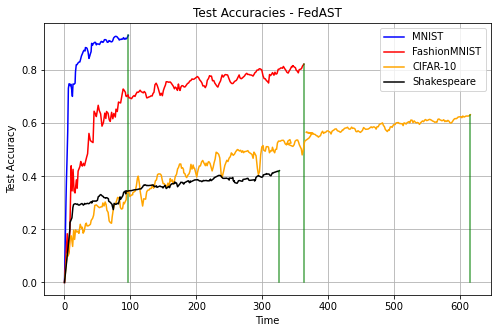

In [7]:
plt.figure(figsize = (8,5))
for i, model in enumerate(fl_server.config.models):
    t = [0]+fl_server.test_accuracies[i][0]
    y = np.array([0]+fl_server.test_accuracies[i][2])
    idx = np.argmax(y == y[-1])
    plt.plot(t,y,color=['blue','red','orange','black'][i])
    plt.plot([t[idx]]*5,np.linspace(0,y[idx],5),color = 'green',alpha = 0.7,label='_nolegend_' )
    plt.legend([r.name for r in fl_server.config.models])
plt.title('Test Accuracies - FedAST')
plt.xlabel('Time')
plt.grid()
plt.ylabel('Test Accuracy')